## Captura e Visualização de dados

<b>Professor:</b> Diénert Vieira
<b>Telefone:</b> (83) 9 8182-1479
<b>Email:</b> dienertalencar@gmail.com

### Segunda avaliação de aprendizagem

Depois de extrairmos os dados bancários, passamos para a sua análise. Podemos detectar padrões de comportamentos e gerar visualizações que nos auxiliem na tomada de decisões.

### Tarefa 03
#### Explorar os dados obtidos, gerar visualizações e obter insights

Primeiro importamos a biblioteca de manipulação de dados: Pandas. E usamos um alias (apelido): pd, por brevidade:

In [22]:
import pandas as pd

Depois podemos listar os arquivos do diretório:

In [23]:
import os
os.listdir("../dados/")

['cartao', 'conta', 'mes.json', 'tudo.csv', 'tudo.json']

Um dataframe é uma estrutura de dados tabular de duas dimensões (linhas e coluns). Um linha ou coluna consiste em uma série na biblioteca Pandas. A linha a seguir transforma o nosso arquivo gerado no exercício anterior em um dataframe, assim podemos executar operações sobre ele como em um banco de dados.

In [24]:
df = pd.read_json("../dados/tudo.json")

Podemos visualizar o dataframe, apenas exibindo o valor da variável 'df', ou usando os métodos .head(n) para as primeiras 'n' linhas ou .tail(n) para as últimas 'n' linhas. Experimente cada um.

In [25]:
df.head()

,date,descricao,valor,referencia
0,2019-12-01,Listo *Garagem F4 2/4\n,-440.00,2020-01-01
1,2019-12-01,Esposende Filial 5/5\n,-27.99,2020-01-01
2,2019-12-01,123 Viagens e Turismo 5/6\n,-584.07,2020-01-01
3,2019-12-01,Maxmilhas*M1 2/3\n,-131.52,2020-01-01
4,2019-12-01,Carajas Construcoes 6/10\n,-67.66,2020-01-01


Para tratarmos as datas de forma apropriada, convertemos as strings para o formato apropriado. Acessamos uma coluna ou série, do dataframe usando .nome_da_coluna ou [nome_da_coluna]. Com isso podemos ver o tipo de cada coluna. Vemos que date já está no formato de data, mas a data de referência está como O de Object, ou seja, string.

In [26]:
df.date.dtype

dtype('<M8[ns]')

In [27]:
df.referencia.dtype

dtype('O')

Convertemos para data da seguinte forma:

In [28]:
dateformat = '%Y/%m/%d'

df['date'] = pd.to_datetime(df['date'], format=dateformat)
df['referencia'] = pd.to_datetime(df['referencia'], format=dateformat)

Conferindo a conversão:

In [29]:
df.referencia.dtype

dtype('<M8[ns]')

Com isso, podemos por exemplo, ordenar todo o dataframe pela data.

Saber a data mínima:

In [30]:
df.date.min()

Timestamp('2019-12-01 00:00:00')

Saber a data máxima:

In [31]:
df.date.max()

Timestamp('2020-09-30 00:00:00')

Colocar a data no índice para transformar o dataframe em séries temporais

In [32]:
df.index = df.date

In [33]:
df = df.drop(columns='date')

In [34]:
df

,descricao,valor,referencia
date,,,
2019-12-01,Listo *Garagem F4 2/4\n,-440.00,2020-01-01
2019-12-01,Esposende Filial 5/5\n,-27.99,2020-01-01
2019-12-01,123 Viagens e Turismo 5/6\n,-584.07,2020-01-01
2019-12-01,Maxmilhas*M1 2/3\n,-131.52,2020-01-01
2019-12-01,Carajas Construcoes 6/10\n,-67.66,2020-01-01
...,...,...,...
2020-09-26,Panificadora Laura Fra\n,-15.50,2020-10-01
2020-09-28,Jp Tambau\n,-18.57,2020-10-01
2020-09-28,Supermercado Bem Mais\n,-278.61,2020-10-01


Ordenando o daframe pelo índice (o padrão é na ordem crescente)

In [35]:
df = df.sort_index()
df

,descricao,valor,referencia
date,,,
2019-12-01,Listo *Garagem F4 2/4\n,-440.00,2020-01-01
2019-12-01,Esposende Filial 5/5\n,-27.99,2020-01-01
2019-12-01,123 Viagens e Turismo 5/6\n,-584.07,2020-01-01
2019-12-01,Maxmilhas*M1 2/3\n,-131.52,2020-01-01
2019-12-01,Carajas Construcoes 6/10\n,-67.66,2020-01-01
...,...,...,...
2020-09-26,Panificadora Laura Fra\n,-15.50,2020-10-01
2020-09-28,Jp Tambau\n,-18.57,2020-10-01
2020-09-28,Supermercado Bem Mais\n,-278.61,2020-10-01


Salvando o arquivo para CSV para visualizar todos os dados no Libre Office

In [36]:
df.to_csv('../dados/tudo.csv')

Podemos também usar a função 'filtra_e_soma' para encontrar algo específico contido na descrição, sem necessariamente informar toda a descrição

In [37]:
def filtra_e_soma(df, descricao):
    filtrado = df[df.descricao.str.lower().str.count(descricao) > 0]
    print('Soma: ', filtrado.valor.sum())
    return filtrado.copy()

In [38]:
#spotify = filtra_e_soma(df, 'ebanx')
pop = filtra_e_soma(df, 'pop')

Soma:  -397.61


In [39]:
#spotify
pop

,descricao,valor,referencia
date,,,
2019-12-02,99* Pop 29nov 23h44min\n,-6.10,2020-01-01
2019-12-04,99* Pop 03dez 15h08min\n,-6.10,2020-01-01
2019-12-04,99* Pop 03dez 17h01min\n,-6.10,2020-01-01
2019-12-09,99* Pop 08dez 13h27min\n,-18.60,2020-01-01
2019-12-09,99* Pop 07dez 16h15min\n,-29.23,2020-01-01
2019-12-09,99* Pop 07dez 23h17min\n,-52.99,2020-01-01
2019-12-09,99* Pop 08dez 16h19min\n,-18.60,2020-01-01
2019-12-11,99* Pop 10dez 19h28min\n,-8.70,2020-01-01
2019-12-12,99* Pop 11dez 16h52min\n,-5.80,2020-01-01


Podemos gerar um histograma para visualizar a distribuição dos valores

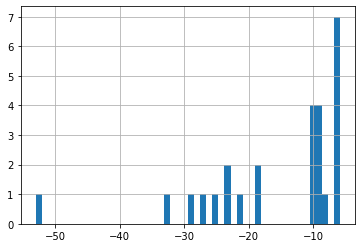

In [48]:
#spotify.valor.hist(bins=50)
pop.valor.hist(bins=50)

In [49]:
#uber = filtra_e_soma(df, 'uber')
supermercado = filtra_e_soma(df, 'supermercado')

Soma:  -4735.16


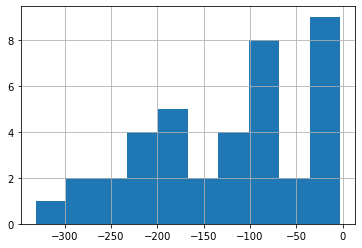

In [50]:
#uber.valor.hist()
supermercado.valor.hist()

Podemos gerar o boxplot, para vermos a mediana e os outlies

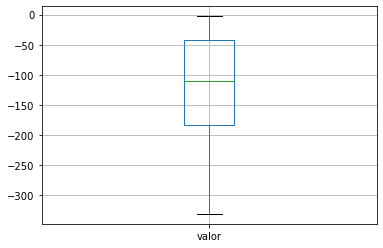

In [51]:
#uber.boxplot()
supermercado.boxplot()

In [52]:
#uber
supermercado

,descricao,valor,referencia
date,,,
2019-12-06,supermercado bem mais\n,-41.03,2020-01-01
2020-01-01,Supermercados Bh\n,-42.68,2020-02-01
2020-01-06,supermercado bem mais\n,-159.02,2020-02-01
2020-01-07,Supermercados Comper L\n,-7.17,2020-02-01
2020-01-09,Supermercado Bem Mais\n,-117.35,2020-02-01
2020-01-16,Supermercado Santiago\n,-8.99,2020-02-01
2020-02-04,Supermercado Colibris\n,-8.38,2020-03-01
2020-03-02,Supermercado Bem Mais\n,-89.97,2020-04-01
2020-03-16,Supermercado Bem Mais\n,-184.65,2020-04-01


Vamos usar a primeira biblioteca de visualziação, além do pandas, o Matplotlib

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [54]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [55]:
def plota_linha1(x, y, titulo, inverte=True):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    ax = plt.axes()
    x = x
    y = y * (-1 if inverte else 1)
    ax.set(title = titulo, 
           xlabel='Tempo',
           ylabel='Gasto R$')
    ax.plot(x, y);

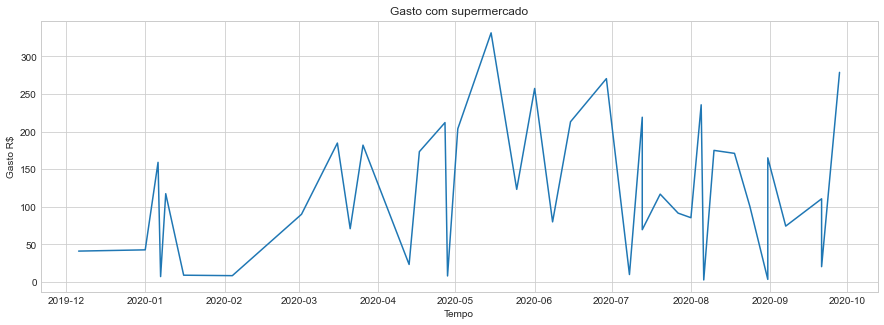

In [56]:
#plota_linha1(uber.index, uber.valor, 'Gasto com Uber')
plota_linha1(supermercado.index, supermercado.valor, 'Gasto com supermercado')

Agora vamos usar uma biblioteca mais rebuscada, a Plotly

In [60]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plota_linha(x, y, titulo, inverte=True):
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Scatter(x=x, y=y * (-1 if inverte else 1), mode='lines+markers')]

    layout = dict(
        title=titulo,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all',
                         label='Tudo',)
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date',

        ),
        #barmode='stack'
    )

    fig = dict(data=data, layout=layout)

    plotly.offline.iplot(fig)

In [61]:
def filtra_soma_plota(df, palavra, titulo, inverte=True):
    filtro = filtra_e_soma(df, palavra)
    plota_linha(filtro.index, filtro.valor, titulo)
    return filtro

In [62]:
filtra_soma_plota(df, '^posto ', 'Gasto com abastecimentos')

Soma:  -1562.32


,descricao,valor,referencia
date,,,
2019-12-06,Posto de Combustiveis\n,-50.08,2020-01-01
2019-12-13,Posto Milenio\n,-100.00,2020-01-01
2019-12-16,Posto Milenio\n,-20.00,2020-01-01
2019-12-20,Posto Viabrasil\n,-100.00,2020-01-01
2020-01-03,Posto Bela Vista\n,-110.63,2020-02-01
2020-01-11,Posto Automix\n,-98.00,2020-02-01
2020-01-14,Posto Petrogas\n,-122.53,2020-02-01
2020-01-14,Posto Santo Antonio\n,-20.00,2020-02-01
2020-02-07,Posto Santa Julia\n,-153.87,2020-03-01


In [63]:
filtra_soma_plota(df, 'uber', 'Gasto com abastecimentos')

Soma:  -56.37


,descricao,valor,referencia
date,,,
2020-01-07,Uber do Brasil Tecnolo\n,-56.37,2020-02-01


In [64]:
filtra_soma_plota(df, 'iof', 'IOF')

Soma:  -28.53


,descricao,valor,referencia
date,,,
2019-12-21,Pag*Antoniofelipedeal\n,-20.00,2020-01-01
2020-07-30,"IOF de ""Google* Play""\n",-8.53,2020-08-01


In [65]:
faturas = filtra_soma_plota(df, 'pgto', 'Faturas do Cartão de Crédito', inverte=False)

Soma:  0.0


In [66]:
faturas = df[df.descricao.str.lower().str.count('pgto') == 0].groupby('referencia')['valor'].sum()
faturas

referencia
2020-01-01   -214.18
2020-02-01    140.01
2020-03-01   -476.00
2020-04-01    361.39
2020-05-01    639.30
2020-06-01     97.11
2020-07-01   -110.83
2020-08-01   -212.66
2020-09-01   -479.97
2020-10-01   -183.06
Name: valor, dtype: float64

In [67]:
plota_linha(faturas.index, faturas.values*-1, 'Gastos Totais')

## Tarefa 03 Concluída